In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
app_df = pd.read_csv('googleplaystore.csv')
app_df = app_df.dropna()
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [3]:
app_df.shape[0]

9360

In [4]:
reviews_df = pd.read_csv('googleplaystore_user_reviews.csv')
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [5]:
reviews_df = reviews_df.dropna()
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [6]:
review_count_df = reviews_df[['App', 'Sentiment']].groupby(by='App', as_index=False).count()
review_count_df = review_count_df.rename(columns={'Sentiment': 'review_count'})
review_count_df.head()

,App,review_count
0,10 Best Foods for You,194
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,40
2,11st,39
3,1800 Contacts - Lens Store,80
4,1LINE – One Line with One Touch,38


In [7]:
app_df = app_df.merge(review_count_df, on='App')
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,review_count
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,44
1,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,44
2,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up,90
3,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39M,"5,000,000+",Free,0,Everyone,Art & Design,3-Aug-18,2.2.5,4.0.3 and up,4
4,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,12M,"100,000+",Free,0,Everyone,Art & Design,20-Mar-18,1.1,4.0.3 and up,38


In [8]:
app_df.shape[0]

1228

In [9]:
sentiment_mean_df = reviews_df[['App', 'Sentiment_Polarity']].groupby(by='App').mean()
sentiment_mean_df = sentiment_mean_df.rename(columns={'Sentiment_Polarity': 'mean_sentiment_polarity'})
sentiment_mean_df = sentiment_mean_df.sort_values(by='mean_sentiment_polarity', ascending=False)


In [10]:
app_df = app_df.merge(sentiment_mean_df, on='App')
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,review_count,mean_sentiment_polarity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,44,0.152652
1,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,44,0.152652
2,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up,90,0.268483
3,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39M,"5,000,000+",Free,0,Everyone,Art & Design,3-Aug-18,2.2.5,4.0.3 and up,4,0.412649
4,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,12M,"100,000+",Free,0,Everyone,Art & Design,20-Mar-18,1.1,4.0.3 and up,38,0.283509


In [11]:
category_df = app_df[['App', 'Category', 'Genres']].groupby('App', as_index=False).first()
reviews_df = reviews_df.merge(category_df, on='App')
reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Genres
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,HEALTH_AND_FITNESS,Health & Fitness
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,HEALTH_AND_FITNESS,Health & Fitness
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000,HEALTH_AND_FITNESS,Health & Fitness
3,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000,HEALTH_AND_FITNESS,Health & Fitness
4,10 Best Foods for You,Best way,Positive,1.000000,0.300000,HEALTH_AND_FITNESS,Health & Fitness
5,10 Best Foods for You,Amazing,Positive,0.600000,0.900000,HEALTH_AND_FITNESS,Health & Fitness
6,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000,HEALTH_AND_FITNESS,Health & Fitness
7,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000,HEALTH_AND_FITNESS,Health & Fitness
8,10 Best Foods for You,good you.,Positive,0.700000,0.600000,HEALTH_AND_FITNESS,Health & Fitness
9,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.200000,0.100000,HEALTH_AND_FITNESS,Health & Fitness


In [12]:
app_df.sort_values(by=['Rating', 'Installs'], ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,review_count,mean_sentiment_polarity
374,Down Dog: Great Yoga Anywhere,HEALTH_AND_FITNESS,4.9,28945,12M,"500,000+",Free,0,Teen,Health & Fitness,17-May-18,2.6.1,4.2 and up,40,0.291847
11,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,7774,17M,"100,000+",Free,0,Everyone,Auto & Vehicles,3-Jul-18,1.7,4.2 and up,24,0.241126
13,DMV Permit Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,6090,27M,"100,000+",Free,0,Everyone,Auto & Vehicles,3-Jul-18,1.7,4.2 and up,34,0.295660
1203,Find a Way: Addictive Puzzle,FAMILY,4.8,39480,14M,"500,000+",Free,0,Everyone,Puzzle,16-Jun-17,4.1.1,4.1 and up,30,0.069630
1220,"DU Recorder – Screen Recorder, Video Editor, Live",VIDEO_PLAYERS,4.8,2588730,9.7M,"50,000,000+",Free,0,Everyone,Video Players & Editors,30-Jul-18,1.7.1.3,5.0 and up,58,0.224187
289,"Even - organize your money, get paid early",FINANCE,4.8,12304,21M,"100,000+",Free,0,Everyone,Finance,2-Aug-18,6.0.16,5.0 and up,14,0.283929
679,Fuzzy Seasons: Animal Forest,FAMILY,4.8,12137,63M,"100,000+",Free,0,Everyone 10+,Simulation;Pretend Play,6-Aug-18,149,4.1 and up,14,0.168933
344,Home Workout - No Equipment,HEALTH_AND_FITNESS,4.8,428156,15M,"10,000,000+",Free,0,Everyone,Health & Fitness,28-Jun-18,Varies with device,Varies with device,26,0.338352
345,Home Workout - No Equipment,HEALTH_AND_FITNESS,4.8,432160,15M,"10,000,000+",Free,0,Everyone,Health & Fitness,28-Jun-18,Varies with device,Varies with device,26,0.338352
346,30 Day Fitness Challenge - Workout at Home,HEALTH_AND_FITNESS,4.8,471036,Varies with device,"10,000,000+",Free,0,Everyone,Health & Fitness,3-Aug-18,Varies with device,4.0 and up,31,0.333537


In [13]:
positive_df = reviews_df[reviews_df['Sentiment'] == 'Positive']
positive_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Genres
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,Health & Fitness
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,Health & Fitness
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,Health & Fitness
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,HEALTH_AND_FITNESS,Health & Fitness
4,10 Best Foods for You,Best way,Positive,1.00,0.300000,HEALTH_AND_FITNESS,Health & Fitness


In [14]:
review_positive_count_df = positive_df[['App', 'Sentiment']].groupby(by='App', as_index=False).count()
review_positive_count_df = review_positive_count_df.rename(columns={'Sentiment': 'review_positive_count'})
review_positive_count_df.head()

,App,review_positive_count
0,10 Best Foods for You,162
1,11st,23
2,1800 Contacts - Lens Store,64
3,1LINE – One Line with One Touch,27
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,25


In [15]:
review_count_df['positive_ratio'] =review_positive_count_df['review_positive_count'] / review_count_df['review_count']
review_count_df.head()

,App,review_count,positive_ratio
0,10 Best Foods for You,194,0.835052
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,40,0.575000
2,11st,39,1.641026
3,1800 Contacts - Lens Store,80,0.337500
4,1LINE – One Line with One Touch,38,0.657895


In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction import stop_words
import re
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()

In [19]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [20]:
def nltk2wn_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

In [21]:
def pre_process(text):
    
    # lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("<!--?.*?-->","",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    tokens = nltk.word_tokenize(text)
    
    # Obtain POS tag of words
    nltk_tagged = nltk.pos_tag(tokens)  
    wn_tagged = map(lambda x: (x[0], nltk2wn_tag(x[1])), nltk_tagged)
    result_words = []
    
    for word, tag in wn_tagged:
        if tag is None:            
            result_words.append(word)
        else:
            result_words.append(lemmatizer.lemmatize(word, tag))
    return " ".join(result_words)

In [22]:
reviews_df['Translated_Review'][0]

'I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"'

In [23]:
pre_process(reviews_df['Translated_Review'][0])

'i like eat delicious food that s i m cook food myself case best food help lot also best before shelf life'

In [24]:
reviews_df['processed_review'] = reviews_df['Translated_Review'].apply(lambda x : pre_process(x))

In [25]:
stopwords = stop_words.ENGLISH_STOP_WORDS

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction import stop_words
import re
from sklearn.feature_extraction.text import TfidfVectorizer 

In [27]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, stop_words=stopwords, use_idf=True)

In [28]:
health_df = reviews_df[reviews_df['Category'] == 'HEALTH_AND_FITNESS']

In [29]:
words_tfidf_vectors = tfidf_vectorizer.fit_transform(health_df['processed_review'])

In [30]:
words = tfidf_vectorizer.get_feature_names()

In [31]:
words

['aap',
 'ab',
 'ability',
 'able',
 'abnormally',
 'abou',
 'abroad',
 'abruptly',
 'abs',
 'absolute',
 'absolutely',
 'accelent',
 'accept',
 'acceptable',
 'access',
 'accessible',
 'accidentally',
 'accidently',
 'accompany',
 'accomplish',
 'accomplished',
 'accord',
 'account',
 'accountability',
 'accountable',
 'accuracy',
 'accurate',
 'accurately',
 'ache',
 'achieve',
 'acknowledge',
 'acknowledges',
 'act',
 'action',
 'active',
 'activity',
 'actual',
 'actually',
 'actuals',
 'ad',
 'add',
 'added',
 'addition',
 'additional',
 'address',
 'adequate',
 'adhd',
 'adjust',
 'adjustable',
 'adjustment',
 'admin',
 'admit',
 'adobe',
 'adore',
 'adult',
 'advance',
 'advanced',
 'advantage',
 'adventure',
 'advert',
 'advertise',
 'advertisement',
 'advertising',
 'advice',
 'advise',
 'adviser',
 'advocate',
 'afew',
 'affect',
 'afford',
 'affordable',
 'african',
 'afternoon',
 'age',
 'aggravate',
 'ago',
 'agreement',
 'ahead',
 'aim',
 'aka',
 'alarm',
 'alcohol',
 'al

In [32]:
words_score_sums = sum(words_tfidf_vectors).T.todense()

In [33]:
health_keywords_df = pd.DataFrame(words_score_sums, index=words, columns=["tfidf"])
health_keywords_df = health_keywords_df[health_keywords_df['tfidf'] > 10]
health_keywords_df = health_keywords_df.sort_values(by=["tfidf"],ascending=False)

In [34]:
health_keywords_df.to_csv('health_keywords.csv')

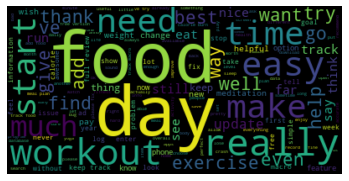

In [35]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
health_text = ' '.join(health_df['processed_review'])

stopwords = set(STOPWORDS)
stopwords.update(["app", "good", "great", "use", 'work', 'love'])

wordcloud = WordCloud(stopwords=stopwords).generate(health_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(reviews_df['processed_review'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [45]:
x_data = vectorizer.transform(reviews_df['processed_review'])
y_data = reviews_df['Sentiment_Polarity']

x_train, x_validation, y_train, y_validation = train_test_split(x_data, y_data, test_size=0.2)

In [46]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
lr.score(x_validation, y_validation)

0.5451731838413438

In [48]:
lr.predict(x_validation)[:10]

array([ 0.26530491,  0.09592592, -0.04648082,  0.1187508 , -0.16116175,
        0.16227184,  0.00462549,  0.27176508,  0.42628319,  0.19763261])

In [49]:
y_validation[:10]

15934    0.205000
24442    0.050000
9642     0.087500
25383    0.118750
10349   -0.105882
11016    0.150000
31199    0.016667
29832   -1.000000
33235    0.600000
18606    0.500000
Name: Sentiment_Polarity, dtype: float64

In [50]:
app_df.corr(method ='pearson')

,Rating,review_count,mean_sentiment_polarity
Rating,1.000000,0.123716,0.220264
review_count,0.123716,1.000000,-0.199235
mean_sentiment_polarity,0.220264,-0.199235,1.000000
